## Final Project Submission

Please fill out:
* Student name: Alaska Lam
* Student pace:  part time 
* Scheduled project review date/time: Friday, Feb 5 2021
* Instructor name: Amber Yandow
* Blog post URL: www.medium.com

In [1]:
#Import Python libraries

import numpy as np
import pandas as pd

import scipy.stats as stats
import statsmodels.api as sm

from sklearn import preprocessing 

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import seaborn as sns
import csv
from pylab import *

import nltk
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
import string
from nltk import word_tokenize, FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.naive_bayes import MultinomialNB


np.random.seed(0)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/wildalaska/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Importing Data and EDA

In [2]:
#Importing data
file_name = 'original_tweets.csv'
df = pd.read_csv(file_name)
df.head()



,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
#rename these columns
df = df.rename(columns = {'emotion_in_tweet_is_directed_at':'brand_or_product', 
                         'is_there_an_emotion_directed_at_a_brand_or_product':'emotion'})

In [4]:
df.head()

,tweet_text,brand_or_product,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [5]:
#Inspecting data, Checking for null/missing values, Inspecting the dataframe types of each column

df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_text        9092 non-null   object
 1   brand_or_product  3291 non-null   object
 2   emotion           9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [6]:
#dropping brand and product column

df = df.drop(columns=['brand_or_product'])
df.head()

,tweet_text,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [7]:
#checking for duplicates and removing

df[df.duplicated()]


,tweet_text,emotion
468,"Before It Even Begins, Apple Wins #SXSW {link}",Positive emotion
776,Google to Launch Major New Social Network Call...,No emotion toward brand or product
2232,Marissa Mayer: Google Will Connect the Digital...,No emotion toward brand or product
2559,Counting down the days to #sxsw plus strong Ca...,Positive emotion
3950,Really enjoying the changes in Gowalla 3.0 for...,Positive emotion
3962,"#SXSW is just starting, #CTIA is around the co...",Positive emotion
4897,"Oh. My. God. The #SXSW app for iPad is pure, u...",Positive emotion
5338,RT @mention â˜º GO BEYOND BORDERS! â˜_ {link} ...,No emotion toward brand or product
5341,"RT @mention â˜º Happy Woman's Day! Make love, ...",No emotion toward brand or product
5881,RT @mention Google to Launch Major New Social ...,No emotion toward brand or product


In [8]:
df = df.drop_duplicates()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9071 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_text  9070 non-null   object
 1   emotion     9071 non-null   object
dtypes: object(2)
memory usage: 212.6+ KB


In [10]:
df[df.duplicated()]


,tweet_text,emotion


In [11]:
#one entry is missing tweet text - drop it
df[df.isna().any(axis=1)]



,tweet_text,emotion
6,NaN,No emotion toward brand or product


In [12]:
df = df.drop(6)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9070 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_text  9070 non-null   object
 1   emotion     9070 non-null   object
dtypes: object(2)
memory usage: 212.6+ KB


In [14]:
df[df.isna().any(axis=1)]


,tweet_text,emotion


In [15]:
#explore unique values for emotion column

df.emotion.unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

In [16]:
print(df[df.emotion == "I can't tell"].count())
print(df[df.emotion == "No emotion toward brand or product"].count())
print(df[df.emotion == "Positive emotion"].count())
print(df[df.emotion == "Negative emotion"].count())


#should we drop this? anyways the negative emotion is skewed


tweet_text    156
emotion       156
dtype: int64
tweet_text    5375
emotion       5375
dtype: int64
tweet_text    2970
emotion       2970
dtype: int64
tweet_text    569
emotion       569
dtype: int64


In [17]:
#dropping the i can't tell 


df = df[df.emotion != "I can't tell"]

In [18]:
print(df[df.emotion == "I can't tell"].count())
print(df[df.emotion == "No emotion toward brand or product"].count())
print(df[df.emotion == "Positive emotion"].count())
print(df[df.emotion == "Negative emotion"].count())

tweet_text    0
emotion       0
dtype: int64
tweet_text    5375
emotion       5375
dtype: int64
tweet_text    2970
emotion       2970
dtype: int64
tweet_text    569
emotion       569
dtype: int64


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8914 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_text  8914 non-null   object
 1   emotion     8914 non-null   object
dtypes: object(2)
memory usage: 208.9+ KB


In [20]:
#rename the neutral value

#df[df.emotion["No emotion toward brand or product"] = ["Neutral emotion"]]
df = df.replace("No emotion toward brand or product","Neutral emotion")

In [21]:
#drop the neutral value for now, add it back in later COME BACK *********

df = df[df.emotion != "Neutral emotion"]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3539 entries, 0 to 9088
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_text  3539 non-null   object
 1   emotion     3539 non-null   object
dtypes: object(2)
memory usage: 82.9+ KB


In [23]:
df.emotion.unique()

array(['Negative emotion', 'Positive emotion'], dtype=object)

In [24]:
print(df[df.emotion == "I can't tell"].count())
print(df[df.emotion == "Neutral emotion"].count())
print(df[df.emotion == "Positive emotion"].count())
print(df[df.emotion == "Negative emotion"].count())

tweet_text    0
emotion       0
dtype: int64
tweet_text    0
emotion       0
dtype: int64
tweet_text    2970
emotion       2970
dtype: int64
tweet_text    569
emotion       569
dtype: int64


In [25]:
##COME BACK and do some frequency histogram blah blah visuals
##let's keep the variables in object-forms for now

## Cleaning and preprocessing data

In [26]:
#make stopwords list

stopwords_list = stopwords.words('english') + list(string.punctuation)
stopwords_list += ["''", '""', '...', '``']

In [27]:

#Getting rid of upper cases. This avoids having multiple copies of the same words 
df['lower_desc'] = df['tweet_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['lower_desc'].head()

0    .@wesley83 i have a 3g iphone. after 3 hrs twe...
1    @jessedee know about @fludapp ? awesome ipad/i...
2    @swonderlin can not wait for #ipad 2 also. the...
3    @sxsw i hope this year's festival isn't as cra...
4    @sxtxstate great stuff on fri #sxsw: marissa m...
Name: lower_desc, dtype: object

In [28]:

#Removing punctuation. It helps us reduce the size of the data 

df['lower_desc'] = df['lower_desc'].str.replace('[^\w\s]','')
df['lower_desc'].head()

0    wesley83 i have a 3g iphone after 3 hrs tweeti...
1    jessedee know about fludapp  awesome ipadiphon...
2    swonderlin can not wait for ipad 2 also they s...
3    sxsw i hope this years festival isnt as crashy...
4    sxtxstate great stuff on fri sxsw marissa maye...
Name: lower_desc, dtype: object

In [29]:

from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [30]:
df['char_count'] = df['tweet_text'].str.len() #how many characters do we have in description? 
print(df[['tweet_text','char_count']].head())
print(df['char_count'].mean())




                                          tweet_text  char_count
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...         127
1  @jessedee Know about @fludapp ? Awesome iPad/i...         139
2  @swonderlin Can not wait for #iPad 2 also. The...          79
3  @sxsw I hope this year's festival isn't as cra...          82
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...         131
106.17179994348686


In [31]:
#how many stop words do we have? 


df['stopwords'] = df['tweet_text'].apply(lambda x:  len([x for x in x.split() if x in stop]))
df[['tweet_text','stopwords']].head(10)


,tweet_text,stopwords
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,7
1,@jessedee Know about @fludapp ? Awesome iPad/i...,6
2,@swonderlin Can not wait for #iPad 2 also. The...,6
3,@sxsw I hope this year's festival isn't as cra...,5
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,1
7,"#SXSW is just starting, #CTIA is around the co...",14
8,Beautifully smart and simple idea RT @madebyma...,4
9,Counting down the days to #sxsw plus strong Ca...,5
10,Excited to meet the @samsungmobileus at #sxsw ...,7
11,Find &amp; Start Impromptu Parties at #SXSW Wi...,2


In [32]:
#removing stopwords 

df['lower_desc'] = df['lower_desc'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['lower_desc'].head()

0    wesley83 3g iphone 3 hrs tweeting rise_austin ...
1    jessedee know fludapp awesome ipadiphone app y...
2                swonderlin wait ipad 2 also sale sxsw
3    sxsw hope years festival isnt crashy years iph...
4    sxtxstate great stuff fri sxsw marissa mayer g...
Name: lower_desc, dtype: object

In [33]:

#most frequent and least frequent words 

freq = pd.Series(' '.join(df['lower_desc']).split()).value_counts()[:20]
freq




sxsw       3652
mention    2412
link       1307
ipad       1162
rt         1057
apple       933
google      774
iphone      673
store       582
2           525
app         450
new         402
austin      312
popup       233
android     218
ipad2       217
amp         192
get         182
launch      181
social      154
dtype: int64

In [34]:
df.head()

,tweet_text,emotion,lower_desc,char_count,stopwords
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,wesley83 3g iphone 3 hrs tweeting rise_austin ...,127,7
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,jessedee know fludapp awesome ipadiphone app y...,139,6
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,swonderlin wait ipad 2 also sale sxsw,79,6
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,sxsw hope years festival isnt crashy years iph...,82,5
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,sxtxstate great stuff fri sxsw marissa mayer g...,131,1


In [35]:
desc_str = ' '.join(df['lower_desc'].tolist())
print(desc_str)[:10]
#making a long string of all the words in the tweets

wesley83 3g iphone 3 hrs tweeting rise_austin dead need upgrade plugin stations sxsw jessedee know fludapp awesome ipadiphone app youll likely appreciate design also theyre giving free ts sxsw swonderlin wait ipad 2 also sale sxsw sxsw hope years festival isnt crashy years iphone app sxsw sxtxstate great stuff fri sxsw marissa mayer google tim oreilly tech booksconferences amp matt mullenweg wordpress sxsw starting ctia around corner googleio hop skip jump good time android fan beautifully smart simple idea rt madebymany thenextweb wrote hollergram ipad app sxsw httpbitlyieavob counting days sxsw plus strong canadian dollar means stock apple gear excited meet samsungmobileus sxsw show sprint galaxy still running android 21 fail find amp start impromptu parties sxsw hurricaneparty httpbitlygvlrin cant wait til android app comes foursquare ups game time sxsw httpjmpgrn7pk still prefer gowalla far best looking android app date gotta love sxsw google calendar featuring top parties show cas

TypeError: 'NoneType' object is not subscriptable

In [36]:
type(desc_str)

str

In [37]:
#let's tokenize some stuff - bag of words

tokens = nltk.word_tokenize(desc_str)
print(len(tokens))

#we have a lot of tokens


44035


In [38]:
#play around w/stemming, lemmatizing etc
#import libraries
nltk.download('wordnet')
from nltk.stem import PorterStemmer, WordNetLemmatizer, SnowballStemmer
porter = PorterStemmer() #instantiate
lemma = WordNetLemmatizer() #instantiate
snow_stemmer = nltk.SnowballStemmer('english')


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/wildalaska/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
#let's try lemmatizing since it has more context

print(porter.stem("playing"))
print(lemma.lemmatize("playing"))
print(snow_stemmer.stem("playing"))

play
playing
play


In [40]:

#look at demographic of parts of speech

tokens_pos = nltk.pos_tag(tokens) #tagging pos in all the tokens plus the individual words
pos_df = pd.DataFrame(tokens_pos,columns = ('word','POS')) 

pos_sum = pos_df.groupby('POS',as_index=False).count() #group by POS tags and count of words
pos_sum.sort_values(['word'],ascending=[False])# in descending order of number of words per tag




,POS,word
10,NN,20990
6,JJ,7743
12,NNS,3061
26,VBP,2646
24,VBG,1644
16,RB,1506
2,CD,1465
23,VBD,1242
27,VBZ,866
5,IN,760


In [41]:

#getting just the nouns

filtered_pos = []
for one in tokens_pos:
    if one[1] == 'NN' or one[1] == 'NNS' or one[1] == 'NNP' or one[1] == 'NNPS':
        filtered_pos.append(one)
print (len(filtered_pos))

filtered_pos[:5]

24133


[('wesley83', 'NN'),
 ('iphone', 'NN'),
 ('hrs', 'NN'),
 ('rise_austin', 'NN'),
 ('need', 'NN')]

In [181]:
#the 100 most common nouns

fdist_pos = nltk.FreqDist(filtered_pos) #making frequency dist
top_100_words = fdist_pos.most_common(20)
print(top_100_words)


[(('mention', 'NN'), 2373), (('sxsw', 'NN'), 2177), (('apple', 'NN'), 933), (('link', 'NN'), 719), (('rt', 'NN'), 718), (('google', 'NN'), 613), (('store', 'NN'), 566), (('iphone', 'NN'), 562), (('ipad', 'NN'), 541), (('app', 'NN'), 296), (('austin', 'NN'), 218), (('popup', 'NN'), 169), (('line', 'NN'), 144), (('time', 'NN'), 143), (('circles', 'NNS'), 139), (('launch', 'NN'), 138), (('ipad2', 'NN'), 130), (('party', 'NN'), 128), (('today', 'NN'), 127), (('day', 'NN'), 116)]


In [182]:
#listing top nouns


top_words_df = pd.DataFrame(top_100_words, columns = ('pos','count'))
top_words_df['Word'] = top_words_df['pos'].apply(lambda x: x[0]) #split the tuple of POS
top_words_df = top_words_df.drop('pos',1) #drop the previous column
top_words_df.head(10)


,count,Word
0,2373,mention
1,2177,sxsw
2,933,apple
3,719,link
4,718,rt
5,613,google
6,566,store
7,562,iphone
8,541,ipad
9,296,app


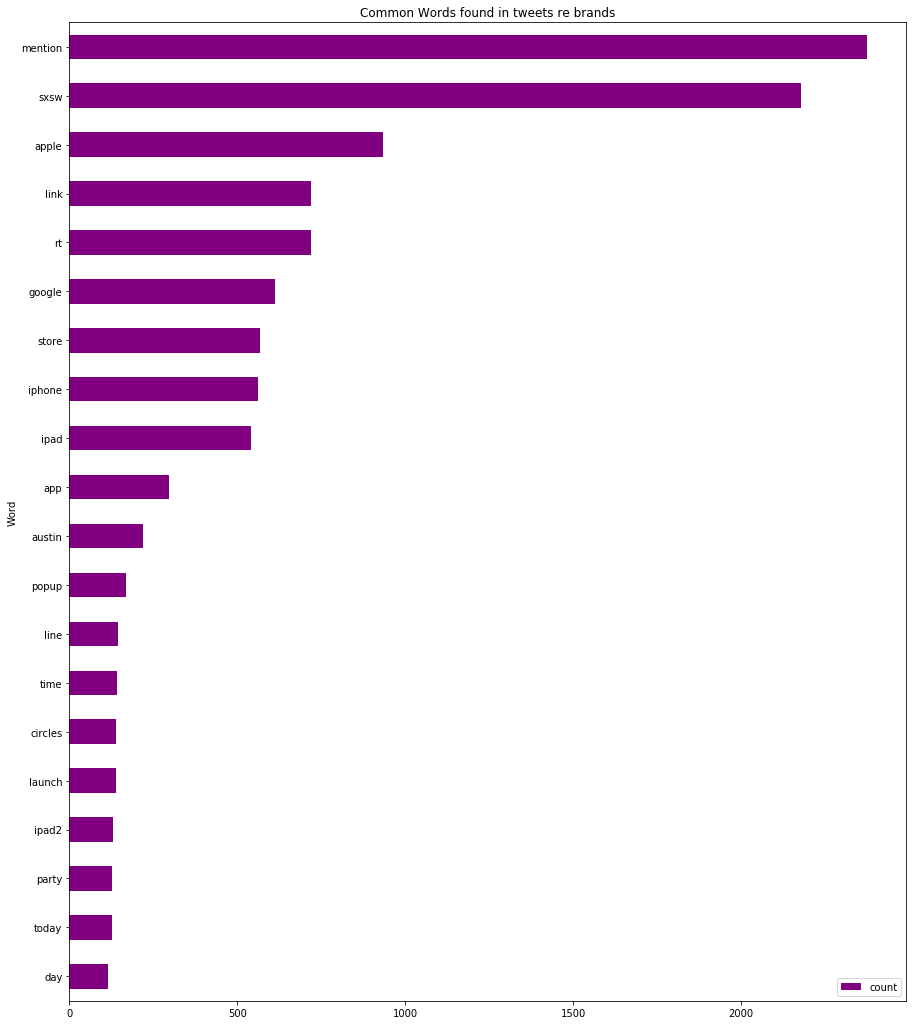

In [183]:
#let's look at common words graph


fig, ax = plt.subplots(figsize=(15,18))
top_words_df.sort_values(by='count').plot.barh(x='Word',y='count', ax=ax,color='purple')

ax.set_title("Common Words found in tweets re brands")
plt.show()

In [45]:
!pip install textblob      #for installation

import textblob            #to import
!pip install wordcloud
from textblob import TextBlob, Word
from wordcloud import WordCloud

#make wordcloud

In [46]:
word_counts = ' '.join(top_words_df['Word'].tolist())
print(type(word_counts))

<class 'str'>


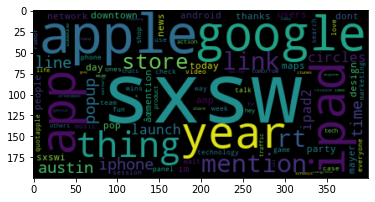

In [47]:
wordcloud = WordCloud().generate(word_counts)
plt.imshow(wordcloud, interpolation = 'bilinear')
#plt.axis('off')
plt.show()



In [48]:
#Decide on stemming / lemmatizing

from nltk.tokenize import sent_tokenize, word_tokenize
def stemSentence(wordsalad):
    token_words=word_tokenize(wordsalad)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

x=stemSentence(desc_str)
print(x)

wesley83 3g iphon 3 hr tweet rise_austin dead need upgrad plugin station sxsw jessede know fludapp awesom ipadiphon app youll like appreci design also theyr give free ts sxsw swonderlin wait ipad 2 also sale sxsw sxsw hope year festiv isnt crashi year iphon app sxsw sxtxstate great stuff fri sxsw marissa mayer googl tim oreilli tech booksconfer amp matt mullenweg wordpress sxsw start ctia around corner googleio hop skip jump good time android fan beauti smart simpl idea rt madebymani thenextweb wrote hollergram ipad app sxsw httpbitlyieavob count day sxsw plu strong canadian dollar mean stock appl gear excit meet samsungmobileu sxsw show sprint galaxi still run android 21 fail find amp start impromptu parti sxsw hurricaneparti httpbitlygvlrin cant wait til android app come foursquar up game time sxsw httpjmpgrn7pk still prefer gowalla far best look android app date got ta love sxsw googl calendar featur top parti show case check rt hamsandwich via ischaf gthttpbitlyaxzwxb great sxsw ip

In [49]:
from nltk.tokenize import sent_tokenize, word_tokenize
def lemSentence(wordsalad):
    token_words=word_tokenize(wordsalad)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(lemma.lemmatize(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

x=lemSentence(desc_str)
print(x)


#let's just go with lemmatize b/c of the context

# porter = PorterStemmer() #instantiate
# lemma = WordNetLemmatizer() #instantiate
# snow_stemmer = nltk.SnowballStemmer('english')

wesley83 3g iphone 3 hr tweeting rise_austin dead need upgrade plugin station sxsw jessedee know fludapp awesome ipadiphone app youll likely appreciate design also theyre giving free t sxsw swonderlin wait ipad 2 also sale sxsw sxsw hope year festival isnt crashy year iphone app sxsw sxtxstate great stuff fri sxsw marissa mayer google tim oreilly tech booksconferences amp matt mullenweg wordpress sxsw starting ctia around corner googleio hop skip jump good time android fan beautifully smart simple idea rt madebymany thenextweb wrote hollergram ipad app sxsw httpbitlyieavob counting day sxsw plus strong canadian dollar mean stock apple gear excited meet samsungmobileus sxsw show sprint galaxy still running android 21 fail find amp start impromptu party sxsw hurricaneparty httpbitlygvlrin cant wait til android app come foursquare ups game time sxsw httpjmpgrn7pk still prefer gowalla far best looking android app date got ta love sxsw google calendar featuring top party show case check rt 

In [50]:
df.head()

,tweet_text,emotion,lower_desc,char_count,stopwords
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,wesley83 3g iphone 3 hrs tweeting rise_austin ...,127,7
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,jessedee know fludapp awesome ipadiphone app y...,139,6
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,swonderlin wait ipad 2 also sale sxsw,79,6
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,sxsw hope years festival isnt crashy years iph...,82,5
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,sxtxstate great stuff fri sxsw marissa mayer g...,131,1


In [51]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(lower_desc):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(lower_desc)]

df['text_lemmatized'] = df.lower_desc.apply(lemmatize_text)

In [52]:
df.head()

,tweet_text,emotion,lower_desc,char_count,stopwords,text_lemmatized
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,wesley83 3g iphone 3 hrs tweeting rise_austin ...,127,7,"[wesley83, 3g, iphone, 3, hr, tweeting, rise_a..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,jessedee know fludapp awesome ipadiphone app y...,139,6,"[jessedee, know, fludapp, awesome, ipadiphone,..."
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,swonderlin wait ipad 2 also sale sxsw,79,6,"[swonderlin, wait, ipad, 2, also, sale, sxsw]"
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,sxsw hope years festival isnt crashy years iph...,82,5,"[sxsw, hope, year, festival, isnt, crashy, yea..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,sxtxstate great stuff fri sxsw marissa mayer g...,131,1,"[sxtxstate, great, stuff, fri, sxsw, marissa, ..."


In [53]:
#cut out the tweet text

df = df.drop(columns=['tweet_text'])
df.head()

,emotion,lower_desc,char_count,stopwords,text_lemmatized
0,Negative emotion,wesley83 3g iphone 3 hrs tweeting rise_austin ...,127,7,"[wesley83, 3g, iphone, 3, hr, tweeting, rise_a..."
1,Positive emotion,jessedee know fludapp awesome ipadiphone app y...,139,6,"[jessedee, know, fludapp, awesome, ipadiphone,..."
2,Positive emotion,swonderlin wait ipad 2 also sale sxsw,79,6,"[swonderlin, wait, ipad, 2, also, sale, sxsw]"
3,Negative emotion,sxsw hope years festival isnt crashy years iph...,82,5,"[sxsw, hope, year, festival, isnt, crashy, yea..."
4,Positive emotion,sxtxstate great stuff fri sxsw marissa mayer g...,131,1,"[sxtxstate, great, stuff, fri, sxsw, marissa, ..."


## Naive Bayes Modeling


In [54]:
#Set up targets and tf-idf

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
import string




In [55]:
df.head()

#we need to assign a number system to the different classes for the confusion matrix to make sense

#df['target'] = '0' if df['emotion'] == 'Negative emotion'

,emotion,lower_desc,char_count,stopwords,text_lemmatized
0,Negative emotion,wesley83 3g iphone 3 hrs tweeting rise_austin ...,127,7,"[wesley83, 3g, iphone, 3, hr, tweeting, rise_a..."
1,Positive emotion,jessedee know fludapp awesome ipadiphone app y...,139,6,"[jessedee, know, fludapp, awesome, ipadiphone,..."
2,Positive emotion,swonderlin wait ipad 2 also sale sxsw,79,6,"[swonderlin, wait, ipad, 2, also, sale, sxsw]"
3,Negative emotion,sxsw hope years festival isnt crashy years iph...,82,5,"[sxsw, hope, year, festival, isnt, crashy, yea..."
4,Positive emotion,sxtxstate great stuff fri sxsw marissa mayer g...,131,1,"[sxtxstate, great, stuff, fri, sxsw, marissa, ..."


In [56]:
#using label encoding

le = preprocessing.LabelEncoder()
df['emotion'] = le.fit_transform(df['emotion'])

#df2 = df.apply(LabelEncoder().fit_transform)
df.head()


,emotion,lower_desc,char_count,stopwords,text_lemmatized
0,0,wesley83 3g iphone 3 hrs tweeting rise_austin ...,127,7,"[wesley83, 3g, iphone, 3, hr, tweeting, rise_a..."
1,1,jessedee know fludapp awesome ipadiphone app y...,139,6,"[jessedee, know, fludapp, awesome, ipadiphone,..."
2,1,swonderlin wait ipad 2 also sale sxsw,79,6,"[swonderlin, wait, ipad, 2, also, sale, sxsw]"
3,0,sxsw hope years festival isnt crashy years iph...,82,5,"[sxsw, hope, year, festival, isnt, crashy, yea..."
4,1,sxtxstate great stuff fri sxsw marissa mayer g...,131,1,"[sxtxstate, great, stuff, fri, sxsw, marissa, ..."


In [57]:
df['text_lemmatized'] = df['text_lemmatized'].astype(str)

In [58]:
df['text_lemmatized'] = df['text_lemmatized'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['text_lemmatized'].head()

0    ['wesley83', '3g', 'iphone', '3', 'hr', 'tweet...
1    ['jessedee', 'know', 'fludapp', 'awesome', 'ip...
2    ['swonderlin', 'wait', 'ipad', '2', 'also', 's...
3    ['sxsw', 'hope', 'year', 'festival', 'isnt', '...
4    ['sxtxstate', 'great', 'stuff', 'fri', 'sxsw',...
Name: text_lemmatized, dtype: object

In [59]:
#df['text_lemmatized'] = " ".join(df['text_lemmatized'])

In [60]:
df.head()

,emotion,lower_desc,char_count,stopwords,text_lemmatized
0,0,wesley83 3g iphone 3 hrs tweeting rise_austin ...,127,7,"['wesley83', '3g', 'iphone', '3', 'hr', 'tweet..."
1,1,jessedee know fludapp awesome ipadiphone app y...,139,6,"['jessedee', 'know', 'fludapp', 'awesome', 'ip..."
2,1,swonderlin wait ipad 2 also sale sxsw,79,6,"['swonderlin', 'wait', 'ipad', '2', 'also', 's..."
3,0,sxsw hope years festival isnt crashy years iph...,82,5,"['sxsw', 'hope', 'year', 'festival', 'isnt', '..."
4,1,sxtxstate great stuff fri sxsw marissa mayer g...,131,1,"['sxtxstate', 'great', 'stuff', 'fri', 'sxsw',..."


In [61]:

#setting our target & features 
X = df['text_lemmatized']
y = df['emotion'] 

# generate a list of stopwords for TfidfVectorizer to ignore
stopwords_list = stopwords.words('english') + list(string.punctuation)



In [62]:
#TD-IF let's vectorize these texts

# generate tf-idf vectorization (use sklearn's TfidfVectorizer) for our data

def tfidf(X, y, stopwords_list):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
    vectorizer = TfidfVectorizer(stop_words=stopwords_list) #initialize
    tf_idf_train = vectorizer.fit_transform(X_train) #transformed the data
    tf_idf_test = vectorizer.transform(X_test)
    return tf_idf_train, tf_idf_test, y_train, y_test, vectorizer #vectorized data

In [63]:
tf_idf_train, tf_idf_test, y_train, y_test, vectorizer = tfidf(X, y, stopwords_list)

#setting external variable

In [64]:
print(tf_idf_train.shape)
print(tf_idf_test.shape)

(2654, 5153)
(885, 5153)


In [65]:
#training some classifiers 

nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(n_estimators=10)

In [66]:
# a function that takes in a classifier and trains it on our tf-idf vectors and generates test and train predictiions
def classify_text(classifier, tf_idf_train, tf_idf_test, y_train): 
    classifier.fit(tf_idf_train, y_train) #fitting this to vectorized data
    train_preds = classifier.predict(tf_idf_train) #making predictions for specific data points 
    test_preds = classifier.predict(tf_idf_test)
    return train_preds, test_preds #return predictions


In [67]:
tf_idf_train.shape

#2654 tweets, 5517 unique words

(2654, 5153)

In [68]:
# generate predictions with Naive Bayes Classifier # setting external variable again and specifying NB classifier
nb_train_preds, nb_test_preds = classify_text(nb_classifier, tf_idf_train, tf_idf_test, y_train)

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test, nb_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test, nb_test_preds)) 


#decent accuracy score; we have a lot of true positives. what does this mean?  we have so many positive tweets
print('Classification Matrix:')
print(classification_report(y_test, nb_test_preds))

[[  6 128]
 [  0 751]]
0.8553672316384181
Classification Matrix:
              precision    recall  f1-score   support

           0       1.00      0.04      0.09       134
           1       0.85      1.00      0.92       751

    accuracy                           0.86       885
   macro avg       0.93      0.52      0.50       885
weighted avg       0.88      0.86      0.79       885



In [69]:
tn, fp, fn, tp = confusion_matrix(y_test, nb_test_preds).ravel()
tn, fp, fn, tp

(6, 128, 0, 751)

In [70]:
print(df[df.emotion == 0].count())
print(df[df.emotion == 1].count())

emotion            569
lower_desc         569
char_count         569
stopwords          569
text_lemmatized    569
dtype: int64
emotion            2970
lower_desc         2970
char_count         2970
stopwords          2970
text_lemmatized    2970
dtype: int64


In [71]:
# generate predictions with Random Forest Classifier
rf_train_preds, rf_test_preds = classify_text(rf_classifier, tf_idf_train, tf_idf_test, y_train)

# evaluate performance of Random Forest Classifier
print(confusion_matrix(y_test, rf_test_preds))
print(accuracy_score(y_test, rf_test_preds))
print('Classification Matrix:')
print(classification_report(y_test, rf_test_preds))

#again we have way more true positive cases since we have more positive cases

[[ 46  88]
 [ 15 736]]
0.8836158192090395
Classification Matrix:
              precision    recall  f1-score   support

           0       0.75      0.34      0.47       134
           1       0.89      0.98      0.93       751

    accuracy                           0.88       885
   macro avg       0.82      0.66      0.70       885
weighted avg       0.87      0.88      0.86       885



In [72]:

tn, fp, fn, tp = confusion_matrix(y_test, rf_test_preds).ravel()
tn, fp, fn, tp

(46, 88, 15, 736)

## Solving for Class Imbalance - using SMOTE

In [73]:
#let's try smote to fix this data and rerun 

#Import SMOTE and print new distribution

from imblearn.over_sampling import SMOTE
print('Original class distribution: \n')
print(pd.Series(y).value_counts()) 

smote = SMOTE()
tf_idf_train_resampled, y_train_resampled = smote.fit_sample(tf_idf_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 


Original class distribution: 

1    2970
0     569
Name: emotion, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1    2219
0    2219
Name: emotion, dtype: int64


In [74]:

nb_classifier.fit(tf_idf_train_resampled, y_train_resampled)
nb_train_preds = nb_classifier.predict(tf_idf_train_resampled)
nb_test_preds = nb_classifier.predict(tf_idf_test)


nb_train_score = accuracy_score(y_train_resampled, nb_train_preds)
nb_test_score = accuracy_score(y_test, nb_test_preds)


print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("")

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test, nb_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test, nb_test_preds)) 


tn, fp, fn, tp = confusion_matrix(y_test, nb_test_preds).ravel()
print(tn, fp, fn, tp)

#the number of true positives decreased and things seem more evenly distributed, though accuracy went down 
#a few points

#but this has a bigger difference between training/test than rf - looks kinda overfit


print('Classification Matrix:')
print(classification_report(y_test, nb_test_preds))

#precision made a big difference even if overall accuracy/f1 score went down a few points -


Multinomial Naive Bayes
Training Accuracy: 0.9626 		 Testing Accuracy: 0.8305

[[ 98  36]
 [114 637]]
0.8305084745762712
98 36 114 637
Classification Matrix:
              precision    recall  f1-score   support

           0       0.46      0.73      0.57       134
           1       0.95      0.85      0.89       751

    accuracy                           0.83       885
   macro avg       0.70      0.79      0.73       885
weighted avg       0.87      0.83      0.84       885



In [75]:
rf_classifier.fit(tf_idf_train_resampled, y_train_resampled)
rf_train_preds = rf_classifier.predict(tf_idf_train_resampled)
rf_test_preds = rf_classifier.predict(tf_idf_test)


rf_train_score = accuracy_score(y_train_resampled, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)


print("Random Forest")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))
print("")

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test, rf_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test, rf_test_preds)) 


tn, fp, fn, tp = confusion_matrix(y_test, rf_test_preds).ravel()
print("tn, fp, fn, tp \t \t")

print(tn, fp, fn, tp)

#this distribution didn't change much. accuracy is about the same. weird!  also looks kinda overfit 

print('Classification Matrix:')
print(classification_report(y_test, rf_test_preds))

Random Forest
Training Accuracy: 0.9984 		 Testing Accuracy: 0.8847

[[ 50  84]
 [ 18 733]]
0.8847457627118644
tn, fp, fn, tp 	 	
50 84 18 733
Classification Matrix:
              precision    recall  f1-score   support

           0       0.74      0.37      0.50       134
           1       0.90      0.98      0.93       751

    accuracy                           0.88       885
   macro avg       0.82      0.67      0.71       885
weighted avg       0.87      0.88      0.87       885



In [76]:
#make a visualization of confusion matrix 



# Metrics

Now let's decide what this means and what to prioritize in the classification matrix.

Precision - out of all the true positive and false positive (all the tweets we labelled positive), 89% were true positives and had positive sentiment, and the other 11% had negative sentiment but we thought they were positive sentiment

Recall - out of all the true positives and false negatives (all actual positive cases), we got 97% true positives which were actually positive sentiment, and 3% we missed - false negatives - they had positive sentiment and we thought they had negative sentiment

Which error is worse? 

Let's optimize for precision - it's more important that we are conservative and lower our false positives - so we can see what the negative tweets are saying and if it's worth investigating or responding to for PR. 

In [77]:
#play with factors in our model

#rf = RandomForestClassifier(n_estimators=100,random_state=50,max_depth=5, min_impurity_decrease=100)
rf = RandomForestClassifier(n_estimators=100, random_state=50)

rf_classifier.fit(tf_idf_train_resampled, y_train_resampled)
rf_train_preds = rf_classifier.predict(tf_idf_train_resampled)
rf_test_preds = rf_classifier.predict(tf_idf_test)


rf_train_score = accuracy_score(y_train_resampled, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)


print("Random Forest")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))
print("")

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test, rf_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test, rf_test_preds)) 


tn, fp, fn, tp = confusion_matrix(y_test, rf_test_preds).ravel()
print("tn, fp, fn, tp \t \t")

print(tn, fp, fn, tp)


print('Classification Matrix:')
print(classification_report(y_test, rf_test_preds))

#eh it's slightly better

Random Forest
Training Accuracy: 0.9989 		 Testing Accuracy: 0.8712

[[ 48  86]
 [ 28 723]]
0.8711864406779661
tn, fp, fn, tp 	 	
48 86 28 723
Classification Matrix:
              precision    recall  f1-score   support

           0       0.63      0.36      0.46       134
           1       0.89      0.96      0.93       751

    accuracy                           0.87       885
   macro avg       0.76      0.66      0.69       885
weighted avg       0.85      0.87      0.86       885



In [78]:
#let's try other factors

#rf = RandomForestClassifier(n_estimators=100,random_state=50,max_depth=5, min_impurity_decrease=100)
rf = RandomForestClassifier(n_estimators=100, random_state=50, max_depth=5)

rf_classifier.fit(tf_idf_train_resampled, y_train_resampled)
rf_train_preds = rf_classifier.predict(tf_idf_train_resampled)
rf_test_preds = rf_classifier.predict(tf_idf_test)


rf_train_score = accuracy_score(y_train_resampled, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)


print("Random Forest")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))
print("")

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test, rf_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test, rf_test_preds)) 


tn, fp, fn, tp = confusion_matrix(y_test, rf_test_preds).ravel()
print("tn, fp, fn, tp \t \t")

print(tn, fp, fn, tp)
#this distribution didn't change much. accuracy is about the same. weird!  also looks kinda overfit as HELL

print('Classification Matrix:')
print(classification_report(y_test, rf_test_preds))

#testing accuracy about the same, still seems overfit. max depth was recommended for 
#not overfitting


Random Forest
Training Accuracy: 0.9986 		 Testing Accuracy: 0.8621

[[ 54  80]
 [ 42 709]]
0.8621468926553673
tn, fp, fn, tp 	 	
54 80 42 709
Classification Matrix:
              precision    recall  f1-score   support

           0       0.56      0.40      0.47       134
           1       0.90      0.94      0.92       751

    accuracy                           0.86       885
   macro avg       0.73      0.67      0.70       885
weighted avg       0.85      0.86      0.85       885



In [79]:

rf = RandomForestClassifier(n_estimators=100, random_state=50, max_depth=5, min_samples_split = 5)

rf_classifier.fit(tf_idf_train_resampled, y_train_resampled)
rf_train_preds = rf_classifier.predict(tf_idf_train_resampled)
rf_test_preds = rf_classifier.predict(tf_idf_test)


rf_train_score = accuracy_score(y_train_resampled, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)


print("Random Forest")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))
print("")

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test, rf_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test, rf_test_preds)) 


tn, fp, fn, tp = confusion_matrix(y_test, rf_test_preds).ravel()
print("tn, fp, fn, tp \t \t")

print(tn, fp, fn, tp)

print('Classification Matrix:')
print(classification_report(y_test, rf_test_preds))

#min sample split not helpful - made things worse across multiple values!

Random Forest
Training Accuracy: 0.9986 		 Testing Accuracy: 0.8723

[[ 50  84]
 [ 29 722]]
0.8723163841807909
tn, fp, fn, tp 	 	
50 84 29 722
Classification Matrix:
              precision    recall  f1-score   support

           0       0.63      0.37      0.47       134
           1       0.90      0.96      0.93       751

    accuracy                           0.87       885
   macro avg       0.76      0.67      0.70       885
weighted avg       0.86      0.87      0.86       885



In [80]:
#rerunning our last good model

rf = RandomForestClassifier(n_estimators=100, random_state=50, max_depth=5)

rf_classifier.fit(tf_idf_train_resampled, y_train_resampled)
rf_train_preds = rf_classifier.predict(tf_idf_train_resampled)
rf_test_preds = rf_classifier.predict(tf_idf_test)


rf_train_score = accuracy_score(y_train_resampled, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)


print("Random Forest")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))
print("")

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test, rf_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test, rf_test_preds)) 


tn, fp, fn, tp = confusion_matrix(y_test, rf_test_preds).ravel()
print("tn, fp, fn, tp \t \t")

print(tn, fp, fn, tp)


print('Classification Matrix:')
print(classification_report(y_test, rf_test_preds))

#improved precision slightly, testing accuracy about the same, still seems overfit

Random Forest
Training Accuracy: 0.9989 		 Testing Accuracy: 0.8678

[[ 51  83]
 [ 34 717]]
0.8677966101694915
tn, fp, fn, tp 	 	
51 83 34 717
Classification Matrix:
              precision    recall  f1-score   support

           0       0.60      0.38      0.47       134
           1       0.90      0.95      0.92       751

    accuracy                           0.87       885
   macro avg       0.75      0.67      0.70       885
weighted avg       0.85      0.87      0.86       885



In [81]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [82]:
#let's try using NB instead, change parameters since it had a .94 precision

nb = MultinomialNB(alpha=.001)

nb_classifier.fit(tf_idf_train_resampled, y_train_resampled)
nb_train_preds = nb_classifier.predict(tf_idf_train_resampled)
nb_test_preds = nb_classifier.predict(tf_idf_test)


nb_train_score = accuracy_score(y_train_resampled, nb_train_preds)
nb_test_score = accuracy_score(y_test, nb_test_preds)


print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("")

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test, nb_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test, nb_test_preds)) 


tn, fp, fn, tp = confusion_matrix(y_test, nb_test_preds).ravel()
print(tn, fp, fn, tp)

print('Classification Matrix:')
print(classification_report(y_test, nb_test_preds))

#well that didn't change anything but this model def seems better and less overfit than the RF

Multinomial Naive Bayes
Training Accuracy: 0.9626 		 Testing Accuracy: 0.8305

[[ 98  36]
 [114 637]]
0.8305084745762712
98 36 114 637
Classification Matrix:
              precision    recall  f1-score   support

           0       0.46      0.73      0.57       134
           1       0.95      0.85      0.89       751

    accuracy                           0.83       885
   macro avg       0.70      0.79      0.73       885
weighted avg       0.87      0.83      0.84       885



In [83]:
nb = MultinomialNB(alpha=1.0,class_prior=1)

nb_classifier.fit(tf_idf_train_resampled, y_train_resampled)
nb_train_preds = nb_classifier.predict(tf_idf_train_resampled)
nb_test_preds = nb_classifier.predict(tf_idf_test)


nb_train_score = accuracy_score(y_train_resampled, nb_train_preds)
nb_test_score = accuracy_score(y_test, nb_test_preds)


print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("")

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test, nb_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test, nb_test_preds)) 


tn, fp, fn, tp = confusion_matrix(y_test, nb_test_preds).ravel()
print(tn, fp, fn, tp)

print('Classification Matrix:')
print(classification_report(y_test, nb_test_preds))

#this didn't help either

Multinomial Naive Bayes
Training Accuracy: 0.9626 		 Testing Accuracy: 0.8305

[[ 98  36]
 [114 637]]
0.8305084745762712
98 36 114 637
Classification Matrix:
              precision    recall  f1-score   support

           0       0.46      0.73      0.57       134
           1       0.95      0.85      0.89       751

    accuracy                           0.83       885
   macro avg       0.70      0.79      0.73       885
weighted avg       0.87      0.83      0.84       885



PAUSE on gridsearch for rn or SKIP 

param_grid = {'alpha': [1, .01, .001, 10],
                  'class_prior': [1,0, 2]}

model = MultinomialNB()

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X,y)


gsc = GridSearchCV(
        estimator=SVR(kernel='rbf'),
        param_grid={'alpha': [1, .01, .001, 10],
                  'class_prior': [1,0, 2]},
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

grid_result = gsc.fit(X, y)
best_params = grid_result.best_params_
best_svr = SVR(kernel='rbf', C=best_params["alpha"], epsilon=best_params["class_prior"],
                   coef0=0.1, shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1)




## Inverse Document Frequency (IDF)

In [84]:
#Let's see what words are important! 

#function that calculates the inverse document frequency(IDF) of each word in our collection
def get_idf(class_, df, stopwords_list):
    docs = df[df.emotion==class_].lower_desc
    class_dict = {} 
    for doc in docs:
        words = set(doc.split())
        for word in words:
            if word.lower() not in stopwords_list: 
                class_dict[word.lower()] = class_dict.get(word.lower(), 0) + 1
    idf_df = pd.DataFrame.from_dict(class_dict, orient='index')
    idf_df.columns = ['IDF']
    idf_df.IDF = np.log(len(docs)/idf_df.IDF)
    idf_df = idf_df.sort_values(by="IDF", ascending=True)
    return idf_df.head(20)

In [85]:
get_idf(1 , df, stopwords_list)


,IDF
sxsw,0.020065
mention,0.665912
link,0.920508
ipad,1.140908
rt,1.277304
apple,1.377578
google,1.606077
store,1.736736
iphone,1.754094
2,1.893759


In [86]:
#can we take out apple, google, etc? ??? feature engineering 
#it doesn't seem like a lot of those top words are useful

## New model, try adding in neutral as a class

In [87]:
file_name = 'original_tweets.csv'
df2 = pd.read_csv(file_name)
df2.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [88]:
df2 = df2.rename(columns = {'emotion_in_tweet_is_directed_at':'brand_or_product', 
                         'is_there_an_emotion_directed_at_a_brand_or_product':'emotion'})

In [89]:
df2.head()

,tweet_text,brand_or_product,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [90]:
df2 = df2.drop(columns=['brand_or_product'])
df2.head()

,tweet_text,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [91]:
df2 = df2.drop_duplicates()

In [92]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9071 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_text  9070 non-null   object
 1   emotion     9071 non-null   object
dtypes: object(2)
memory usage: 212.6+ KB


In [93]:
df2[df2.isna().any(axis=1)]
df2 = df2.drop(6)


In [94]:
df2.head()

,tweet_text,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [95]:
print(df2[df2.emotion == "I can't tell"].count())
print(df2[df2.emotion == "No emotion toward brand or product"].count())
print(df2[df2.emotion == "Positive emotion"].count())
print(df2[df2.emotion == "Negative emotion"].count())

tweet_text    156
emotion       156
dtype: int64
tweet_text    5375
emotion       5375
dtype: int64
tweet_text    2970
emotion       2970
dtype: int64
tweet_text    569
emotion       569
dtype: int64


In [96]:
df2 = df2[df2.emotion != "I can't tell"]

In [97]:

print(df2[df2.emotion == "I can't tell"].count())
print(df2[df2.emotion == "No emotion toward brand or product"].count())
print(df2[df2.emotion == "Positive emotion"].count())
print(df2[df2.emotion == "Negative emotion"].count())
df2 = df2.replace("No emotion toward brand or product","Neutral emotion")

tweet_text    0
emotion       0
dtype: int64
tweet_text    5375
emotion       5375
dtype: int64
tweet_text    2970
emotion       2970
dtype: int64
tweet_text    569
emotion       569
dtype: int64


In [98]:
df2['lower_desc'] = df2['tweet_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df2['lower_desc'].head()


0    .@wesley83 i have a 3g iphone. after 3 hrs twe...
1    @jessedee know about @fludapp ? awesome ipad/i...
2    @swonderlin can not wait for #ipad 2 also. the...
3    @sxsw i hope this year's festival isn't as cra...
4    @sxtxstate great stuff on fri #sxsw: marissa m...
Name: lower_desc, dtype: object

In [99]:

df2['lower_desc'] = df2['lower_desc'].str.replace('[^\w\s]','')
df2['lower_desc'].head()

0    wesley83 i have a 3g iphone after 3 hrs tweeti...
1    jessedee know about fludapp  awesome ipadiphon...
2    swonderlin can not wait for ipad 2 also they s...
3    sxsw i hope this years festival isnt as crashy...
4    sxtxstate great stuff on fri sxsw marissa maye...
Name: lower_desc, dtype: object

In [100]:
#removing stopwords 


df2['lower_desc'] = df2['lower_desc'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df2['lower_desc'].head()

0    wesley83 3g iphone 3 hrs tweeting rise_austin ...
1    jessedee know fludapp awesome ipadiphone app y...
2                swonderlin wait ipad 2 also sale sxsw
3    sxsw hope years festival isnt crashy years iph...
4    sxtxstate great stuff fri sxsw marissa mayer g...
Name: lower_desc, dtype: object

In [101]:
#most frequent and least frequent words 

freq = pd.Series(' '.join(df2['lower_desc']).split()).value_counts()[:20]
freq



sxsw       9259
mention    6770
link       4221
rt         2881
ipad       2361
google     2280
apple      2105
iphone     1481
store      1445
new        1073
2          1048
austin      936
app         798
amp         713
launch      637
social      622
circles     598
popup       590
android     556
today       549
dtype: int64

In [102]:
desc_str2 = ' '.join(df2['lower_desc'].tolist())
tokens2 = nltk.word_tokenize(desc_str2)
print(len(tokens2))

110346


In [103]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(lower_desc):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(lower_desc)]

df2['text_lemmatized'] = df2.lower_desc.apply(lemmatize_text)

In [104]:
df2.head()

,tweet_text,emotion,lower_desc,text_lemmatized
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,wesley83 3g iphone 3 hrs tweeting rise_austin ...,"[wesley83, 3g, iphone, 3, hr, tweeting, rise_a..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,jessedee know fludapp awesome ipadiphone app y...,"[jessedee, know, fludapp, awesome, ipadiphone,..."
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,swonderlin wait ipad 2 also sale sxsw,"[swonderlin, wait, ipad, 2, also, sale, sxsw]"
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,sxsw hope years festival isnt crashy years iph...,"[sxsw, hope, year, festival, isnt, crashy, yea..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,sxtxstate great stuff fri sxsw marissa mayer g...,"[sxtxstate, great, stuff, fri, sxsw, marissa, ..."


In [105]:
df2 = df2.drop(columns=['tweet_text'])
df2.head()

,emotion,lower_desc,text_lemmatized
0,Negative emotion,wesley83 3g iphone 3 hrs tweeting rise_austin ...,"[wesley83, 3g, iphone, 3, hr, tweeting, rise_a..."
1,Positive emotion,jessedee know fludapp awesome ipadiphone app y...,"[jessedee, know, fludapp, awesome, ipadiphone,..."
2,Positive emotion,swonderlin wait ipad 2 also sale sxsw,"[swonderlin, wait, ipad, 2, also, sale, sxsw]"
3,Negative emotion,sxsw hope years festival isnt crashy years iph...,"[sxsw, hope, year, festival, isnt, crashy, yea..."
4,Positive emotion,sxtxstate great stuff fri sxsw marissa mayer g...,"[sxtxstate, great, stuff, fri, sxsw, marissa, ..."


In [106]:
#using label encoding

le = preprocessing.LabelEncoder()
df2['emotion'] = le.fit_transform(df2['emotion'])

df2.head()

,emotion,lower_desc,text_lemmatized
0,0,wesley83 3g iphone 3 hrs tweeting rise_austin ...,"[wesley83, 3g, iphone, 3, hr, tweeting, rise_a..."
1,2,jessedee know fludapp awesome ipadiphone app y...,"[jessedee, know, fludapp, awesome, ipadiphone,..."
2,2,swonderlin wait ipad 2 also sale sxsw,"[swonderlin, wait, ipad, 2, also, sale, sxsw]"
3,0,sxsw hope years festival isnt crashy years iph...,"[sxsw, hope, year, festival, isnt, crashy, yea..."
4,2,sxtxstate great stuff fri sxsw marissa mayer g...,"[sxtxstate, great, stuff, fri, sxsw, marissa, ..."


In [123]:
df2['text_lemmatized'] = df2['text_lemmatized'].astype(str)
df2['text_lemmatized'] = df2['text_lemmatized'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df2['text_lemmatized'].head()

0    ['wesley83', '3g', 'iphone', '3', 'hr', 'tweet...
1    ['jessedee', 'know', 'fludapp', 'awesome', 'ip...
2    ['swonderlin', 'wait', 'ipad', '2', 'also', 's...
3    ['sxsw', 'hope', 'year', 'festival', 'isnt', '...
4    ['sxtxstate', 'great', 'stuff', 'fri', 'sxsw',...
Name: text_lemmatized, dtype: object

In [124]:
#setting our target & features 
X = df2['text_lemmatized']
y = df2['emotion'] 

# generate a list of stopwords for TfidfVectorizer to ignore
stopwords_list = stopwords.words('english') + list(string.punctuation)



In [125]:
#TD-IF let's vectorize these texts

# generate tf-idf vectorization (use sklearn's TfidfVectorizer) for our data

def tfidf(X, y, stopwords_list):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 45)
    vectorizer = TfidfVectorizer(stop_words=stopwords_list) #initialize
    tf_idf_train = vectorizer.fit_transform(X_train) #transformed the data
    tf_idf_test = vectorizer.transform(X_test)
    return tf_idf_train, tf_idf_test, y_train, y_test, vectorizer #vectorized data

In [126]:
tf_idf_train, tf_idf_test, y_train, y_test, vectorizer = tfidf(X, y, stopwords_list)

#setting external variable

In [127]:
print(tf_idf_train.shape)
print(tf_idf_test.shape)

(6685, 8738)
(2229, 8738)


In [128]:
#training some classifiers 

nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(n_estimators=10)

In [129]:
#SMOTE

#Import SMOTE and print new distribution

from imblearn.over_sampling import SMOTE
print('Original class distribution: \n')
print(pd.Series(y).value_counts()) 

smote = SMOTE()
tf_idf_train_resampled, y_train_resampled = smote.fit_sample(tf_idf_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

1    5375
2    2970
0     569
Name: emotion, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

2    4019
1    4019
0    4019
Name: emotion, dtype: int64


In [131]:
nb_classifier.fit(tf_idf_train_resampled, y_train_resampled)
nb_train_preds = nb_classifier.predict(tf_idf_train_resampled)
nb_test_preds = nb_classifier.predict(tf_idf_test)


nb_train_score = accuracy_score(y_train_resampled, nb_train_preds)
nb_test_score = accuracy_score(y_test, nb_test_preds)


print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("")

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test, nb_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test, nb_test_preds)) 


#tn, fp, fn, tp = confusion_matrix(y_test, nb_test_preds).ravel()
#print(tn, fp, fn, tp)

#


print('Classification Matrix:')
print(classification_report(y_test, nb_test_preds))

#Testing accuracy is awful


Multinomial Naive Bayes
Training Accuracy: 0.867 		 Testing Accuracy: 0.5962

[[ 84  22  32]
 [145 763 448]
 [ 77 176 482]]
0.5962314939434724
Classification Matrix:
              precision    recall  f1-score   support

           0       0.27      0.61      0.38       138
           1       0.79      0.56      0.66      1356
           2       0.50      0.66      0.57       735

    accuracy                           0.60      2229
   macro avg       0.52      0.61      0.54      2229
weighted avg       0.67      0.60      0.61      2229



In [132]:
rf_classifier.fit(tf_idf_train_resampled, y_train_resampled)
rf_train_preds = rf_classifier.predict(tf_idf_train_resampled)
rf_test_preds = rf_classifier.predict(tf_idf_test)


rf_train_score = accuracy_score(y_train_resampled, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)


print("Random Forest")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))
print("")

# evaluate performance of RF Classifier
print(confusion_matrix(y_test, rf_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test, rf_test_preds)) 


#tn, fp, fn, tp = confusion_matrix(y_test, rf_test_preds).ravel()
#print("tn, fp, fn, tp \t \t")

#print(tn, fp, fn, tp)

print('Classification Matrix:')
print(classification_report(y_test, rf_test_preds))

Random Forest
Training Accuracy: 0.9904 		 Testing Accuracy: 0.6649

[[  43   75   20]
 [  24 1103  229]
 [  11  388  336]]
0.6648721399730821
Classification Matrix:
              precision    recall  f1-score   support

           0       0.55      0.31      0.40       138
           1       0.70      0.81      0.75      1356
           2       0.57      0.46      0.51       735

    accuracy                           0.66      2229
   macro avg       0.61      0.53      0.55      2229
weighted avg       0.65      0.66      0.65      2229



## Metrics for 3-classes


This gets trickier - 0 is negative, 2 is positive, and 1 is neutral
Earlier we said precision for positive sentiments

Let's do the same thing - optimize precision for postiive sentiments so we are reducing the false positives. 

.50/.57 is not great, let's try to improve it

In [155]:
#rf = RandomForestClassifier(n_estimators=100,random_state=50,max_depth=5, min_impurity_decrease=100)
rf = RandomForestClassifier(n_estimators=100, random_state=20)

rf_classifier.fit(tf_idf_train_resampled, y_train_resampled)
rf_train_preds = rf_classifier.predict(tf_idf_train_resampled)
rf_test_preds = rf_classifier.predict(tf_idf_test)


rf_train_score = accuracy_score(y_train_resampled, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)


print("Random Forest")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))
print("")

# evaluate performance of RF Classifier
print(confusion_matrix(y_test, rf_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test, rf_test_preds)) 


#tn, fp, fn, tp = confusion_matrix(y_test, rf_test_preds).ravel()
#print("tn, fp, fn, tp \t \t")

#print(tn, fp, fn, tp)


print('Classification Matrix:')
print(classification_report(y_test, rf_test_preds))
#precision went up from .57! accuracy about the same


Random Forest
Training Accuracy: 0.9895 		 Testing Accuracy: 0.6716

[[  35   87   16]
 [  26 1119  211]
 [  15  377  343]]
0.6716016150740243
Classification Matrix:
              precision    recall  f1-score   support

           0       0.46      0.25      0.33       138
           1       0.71      0.83      0.76      1356
           2       0.60      0.47      0.53       735

    accuracy                           0.67      2229
   macro avg       0.59      0.52      0.54      2229
weighted avg       0.66      0.67      0.66      2229



In [160]:
rf = RandomForestClassifier(n_estimators=100, random_state=20,max_depth=5)

rf_classifier.fit(tf_idf_train_resampled, y_train_resampled)
rf_train_preds = rf_classifier.predict(tf_idf_train_resampled)
rf_test_preds = rf_classifier.predict(tf_idf_test)


rf_train_score = accuracy_score(y_train_resampled, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)


print("Random Forest")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))
print("")

# evaluate performance of RF Classifier
print(confusion_matrix(y_test, rf_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test, rf_test_preds)) 


#tn, fp, fn, tp = confusion_matrix(y_test, rf_test_preds).ravel()
#print("tn, fp, fn, tp \t \t")

#print(tn, fp, fn, tp)


print('Classification Matrix:')
print(classification_report(y_test, rf_test_preds))
#it slightly improves or stays the same


Random Forest
Training Accuracy: 0.9905 		 Testing Accuracy: 0.6707

[[  35   80   23]
 [  28 1105  223]
 [  11  369  355]]
0.670704351727232
Classification Matrix:
              precision    recall  f1-score   support

           0       0.47      0.25      0.33       138
           1       0.71      0.81      0.76      1356
           2       0.59      0.48      0.53       735

    accuracy                           0.67      2229
   macro avg       0.59      0.52      0.54      2229
weighted avg       0.66      0.67      0.66      2229



In [167]:

rf = RandomForestClassifier(n_estimators=100, random_state=20,max_depth=5, min_samples_split = 3)

rf_classifier.fit(tf_idf_train_resampled, y_train_resampled)
rf_train_preds = rf_classifier.predict(tf_idf_train_resampled)
rf_test_preds = rf_classifier.predict(tf_idf_test)


rf_train_score = accuracy_score(y_train_resampled, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)


print("Random Forest")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))
print("")

# evaluate performance of RF Classifier
print(confusion_matrix(y_test, rf_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test, rf_test_preds)) 


#tn, fp, fn, tp = confusion_matrix(y_test, rf_test_preds).ravel()
#print("tn, fp, fn, tp \t \t")

#print(tn, fp, fn, tp)


print('Classification Matrix:')
print(classification_report(y_test, rf_test_preds))
#it slightly improves or stays the same

Random Forest
Training Accuracy: 0.9912 		 Testing Accuracy: 0.6698

[[  33   85   20]
 [  20 1143  193]
 [   5  413  317]]
0.6698070883804397
Classification Matrix:
              precision    recall  f1-score   support

           0       0.57      0.24      0.34       138
           1       0.70      0.84      0.76      1356
           2       0.60      0.43      0.50       735

    accuracy                           0.67      2229
   macro avg       0.62      0.50      0.53      2229
weighted avg       0.66      0.67      0.65      2229



In [ ]:
# Try NB improvements

In [170]:

nb = MultinomialNB(alpha=.01)

nb_classifier.fit(tf_idf_train_resampled, y_train_resampled)
nb_train_preds = nb_classifier.predict(tf_idf_train_resampled)
nb_test_preds = nb_classifier.predict(tf_idf_test)


nb_train_score = accuracy_score(y_train_resampled, nb_train_preds)
nb_test_score = accuracy_score(y_test, nb_test_preds)


print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("")

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test, nb_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test, nb_test_preds)) 


#tn, fp, fn, tp = confusion_matrix(y_test, nb_test_preds).ravel()
#print(tn, fp, fn, tp)

#


print('Classification Matrix:')
print(classification_report(y_test, nb_test_preds))

#not helpful

Multinomial Naive Bayes
Training Accuracy: 0.867 		 Testing Accuracy: 0.5962

[[ 84  22  32]
 [145 763 448]
 [ 77 176 482]]
0.5962314939434724
Classification Matrix:
              precision    recall  f1-score   support

           0       0.27      0.61      0.38       138
           1       0.79      0.56      0.66      1356
           2       0.50      0.66      0.57       735

    accuracy                           0.60      2229
   macro avg       0.52      0.61      0.54      2229
weighted avg       0.67      0.60      0.61      2229



In [173]:
nb = MultinomialNB(alpha=.01, class_prior=1)

nb_classifier.fit(tf_idf_train_resampled, y_train_resampled)
nb_train_preds = nb_classifier.predict(tf_idf_train_resampled)
nb_test_preds = nb_classifier.predict(tf_idf_test)


nb_train_score = accuracy_score(y_train_resampled, nb_train_preds)
nb_test_score = accuracy_score(y_test, nb_test_preds)


print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("")

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test, nb_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test, nb_test_preds)) 


#tn, fp, fn, tp = confusion_matrix(y_test, nb_test_preds).ravel()
#print(tn, fp, fn, tp)

#


print('Classification Matrix:')
print(classification_report(y_test, nb_test_preds))



Multinomial Naive Bayes
Training Accuracy: 0.867 		 Testing Accuracy: 0.5962

[[ 84  22  32]
 [145 763 448]
 [ 77 176 482]]
0.5962314939434724
Classification Matrix:
              precision    recall  f1-score   support

           0       0.27      0.61      0.38       138
           1       0.79      0.56      0.66      1356
           2       0.50      0.66      0.57       735

    accuracy                           0.60      2229
   macro avg       0.52      0.61      0.54      2229
weighted avg       0.67      0.60      0.61      2229



#With 3 classes, the RF seems to be a better model, approaching .58-.61 precision for positive sentiment. This still needs much improvement as it's incredibly overfit. Running the same RF model again to take a look: 

In [174]:
rf = RandomForestClassifier(n_estimators=100, random_state=20,max_depth=5, min_samples_split = 3)

rf_classifier.fit(tf_idf_train_resampled, y_train_resampled)
rf_train_preds = rf_classifier.predict(tf_idf_train_resampled)
rf_test_preds = rf_classifier.predict(tf_idf_test)


rf_train_score = accuracy_score(y_train_resampled, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)


print("Random Forest")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))
print("")

# evaluate performance of RF Classifier
print(confusion_matrix(y_test, rf_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test, rf_test_preds)) 


#tn, fp, fn, tp = confusion_matrix(y_test, rf_test_preds).ravel()
#print("tn, fp, fn, tp \t \t")

#print(tn, fp, fn, tp)


print('Classification Matrix:')
print(classification_report(y_test, rf_test_preds))
#it slightly improves or stays the same

Random Forest
Training Accuracy: 0.9889 		 Testing Accuracy: 0.6752

[[  37   84   17]
 [  20 1148  188]
 [  13  402  320]]
0.6751906684611934
Classification Matrix:
              precision    recall  f1-score   support

           0       0.53      0.27      0.36       138
           1       0.70      0.85      0.77      1356
           2       0.61      0.44      0.51       735

    accuracy                           0.68      2229
   macro avg       0.61      0.52      0.54      2229
weighted avg       0.66      0.68      0.66      2229



## Conclusion

In conclusion:

1) Promoting launch events seems to drive a significant proportion of product-related tweets

2) Using social media giveaways to encourage re-tweets or links to your product, also seems to drive a significant amount of product-related tweets

3) Focus PR resources on analyzing negative-sentiment tweets and deciding which types of negative tweets are worth addressing

## Future Work

1) Use additional resources to fine-tune the current models ie GridSearch

2) Further feature-engineering: Calculate a new model based on a list of specific, important words that have strong sentiment one way or another [ie tweets with “great”, “awful”, or “terrible” in them] 

3) Obtain more tweet-data from other tech companies, particularly small startups and PR companies
